**Data fields**
- **state**, string. 2-letter code of the US state of customer residence
- **account_length**, numerical. Number of months the customer has been with the - current telco provider
- **area_code**, string="area_code_AAA" where AAA = 3 digit area code.
- **international_plan**, (yes/no). The customer has international plan.
- **voice_mail_plan**, (yes/no). The customer has voice mail plan.
- **number_vmail_messages**, numerical. Number of voice-mail messages.
- **total_day_minutes**, numerical. Total minutes of day calls.
- **total_day_calls**, numerical. Total number of day calls.
- **total_day_charge**, numerical. Total charge of day calls.
- **total_eve_minutes**, numerical. Total minutes of evening calls.
- **total_eve_calls**, numerical. Total number of evening calls.
- **total_eve_charge**, numerical. Total charge of evening calls.
- **total_night_minutes**, numerical. Total minutes of night calls.
- **total_night_calls**, numerical. Total number of night calls.
- **total_night_charge**, numerical. Total charge of night calls.
- **total_intl_minutes**, numerical. Total minutes of international calls.
- **total_intl_calls**, numerical. Total number of international calls.
- **total_intl_charge**, numerical. Total charge of international calls
- **number_customer_service_calls**, numerical. Number of calls to customer service
- **churn**, (yes/no). Customer churn - target variable.

**Source** : https://www.kaggle.com/competitions/customer-churn-prediction-2020/data
 

In [ ]:
# Basic library for data processing and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset

#picking the file to read from the drive 
drive_url = 'https://drive.google.com/file/d/1xdVVb0VglwxDUPm6afIBCNOrVW4BEU1b/view?usp=sharing' #Read the Excel Sheet, which contains 4000 House properties scraped from zolo.ca.
new_url = 'https://drive.google.com/uc?export=download&id=' + drive_url.split('/')[-2] #Save into temporary location

data = pd.read_csv(new_url)

# first 5 samples from dataset
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


#EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

- there are total 18 features and 1 target.
- we have total 4250 samples.
- There is no null value in the dataset.

In [ ]:
data['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

data is skewed towards negative class.

In [ ]:
# Exploring state feature
number_of_state = data['state'].nunique()
state_occurance = data['state'].value_counts()
print(f'Number of different state in the dataset are {number_of_state}')
print(f'state and their count as following \n{state_occurance}')

Number of different state in the dataset are 51
state and their count as following 
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64


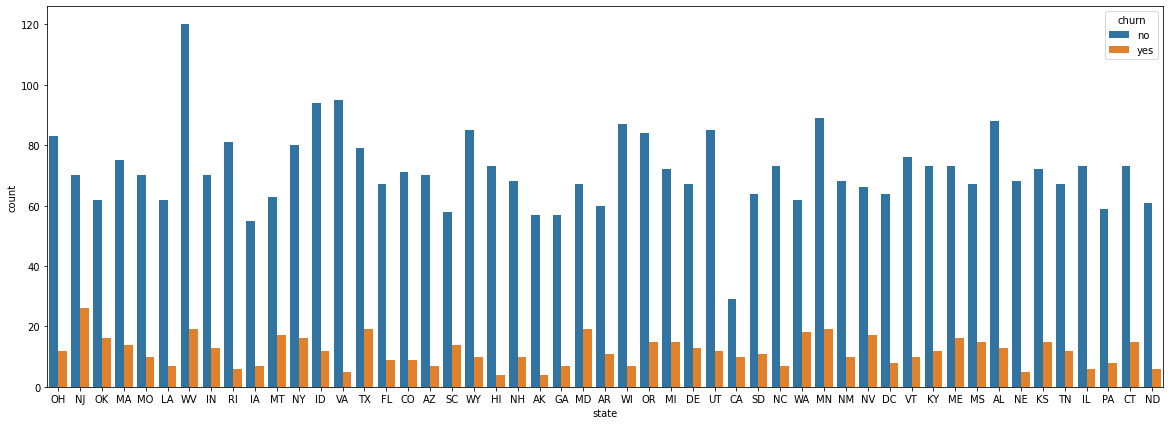

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(hue='churn',x='state',data=data)

In [ ]:
# Statistical properties of account_length feature
data['account_length'].describe()

count    4250.000000
mean      100.236235
std        39.698401
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [ ]:
data[data['churn']=='yes']['account_length'].describe()

count    598.000000
mean     102.137124
std       39.369162
min        2.000000
25%       76.000000
50%      101.000000
75%      125.000000
max      225.000000
Name: account_length, dtype: float64

In [ ]:
data[data['churn']=='no']['account_length'].describe()

count    3652.000000
mean       99.924973
std        39.748743
min         1.000000
25%        73.000000
50%        99.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

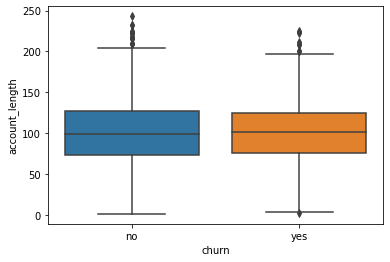

In [ ]:
sns.boxplot(x='churn',y='account_length',data=data)

**There is no direct relation between the number of the months customer with telecom and churning**

In [ ]:
data['area_code'] = data['area_code'].apply(lambda x : int(x.split('_')[-1]))

In [ ]:
data['area_code'].nunique(),data['area_code'].value_counts()

(3, 415    2108
 408    1086
 510    1056
 Name: area_code, dtype: int64)

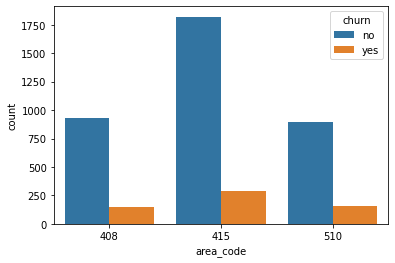

In [ ]:
sns.countplot(hue='churn',x='area_code',data=data)

In [ ]:
n_yes = data[data['churn']=='yes'].shape[0]
n_no = data[data['churn']=='no'].shape[0]

print(data[(data['area_code']==408) & (data['churn']=='yes')].shape[0]/n_yes)
print(data[(data['area_code']==415) & (data['churn']=='yes')].shape[0]/n_yes)
print(data[(data['area_code']==510) & (data['churn']=='yes')].shape[0]/n_yes)
print(data[(data['area_code']==408) & (data['churn']=='no')].shape[0]/n_no)
print(data[(data['area_code']==415) & (data['churn']=='no')].shape[0]/n_no)
print(data[(data['area_code']==510) & (data['churn']=='no')].shape[0]/n_no)


0.25418060200668896
0.479933110367893
0.26588628762541805
0.255750273822563
0.49863088718510407
0.24561883899233297


**Area code seems have not have direct impact to the customer churn**

In [ ]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
data['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

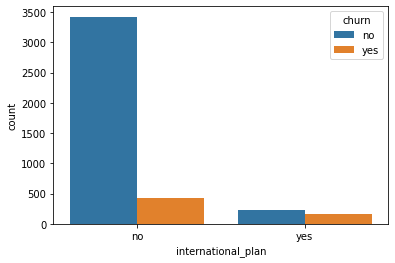

In [ ]:
sns.countplot(hue='churn',x='international_plan',data=data)

In [ ]:
print(data[(data['international_plan']=='yes') & (data['churn']=='yes')].shape[0]/n_yes)
print(data[(data['international_plan']=='no') & (data['churn']=='yes')].shape[0]/n_yes)
print(data[(data['international_plan']=='yes') & (data['churn']=='no')].shape[0]/n_no)
print(data[(data['international_plan']=='no') & (data['churn']=='no')].shape[0]/n_no)

0.2792642140468227
0.7207357859531772
0.0627053669222344
0.9372946330777656


**Those who has not international_plan probably have high chances staying with current telco provider**

In [ ]:
data['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

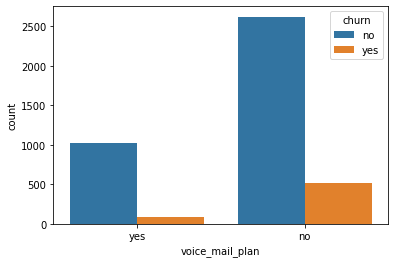

In [ ]:
sns.countplot(hue='churn',x='voice_mail_plan',data=data)

In [ ]:
print(data[(data['voice_mail_plan']=='yes') & (data['churn']=='yes')].shape[0]/n_yes)
print(data[(data['voice_mail_plan']=='no') & (data['churn']=='yes')].shape[0]/n_yes)
print(data[(data['voice_mail_plan']=='yes') & (data['churn']=='no')].shape[0]/n_no)
print(data[(data['voice_mail_plan']=='no') & (data['churn']=='no')].shape[0]/n_no)

0.13712374581939799
0.862876254180602
0.28203723986856516
0.7179627601314348


In [ ]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


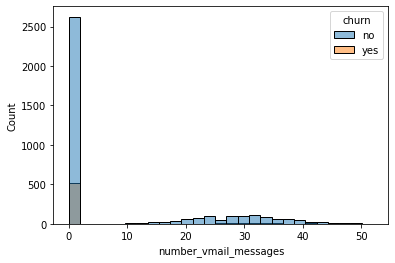

In [ ]:
sns.histplot(x='number_vmail_messages',hue='churn',data=data)

In [ ]:
data[(data['number_vmail_messages']==0) & (data['churn']=='yes')].shape[0]

516

In [ ]:
data['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

No clear relation of number of voice mail messages with churn.

In [ ]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
numerical_features = ['account_length','number_vmail_messages','total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge']

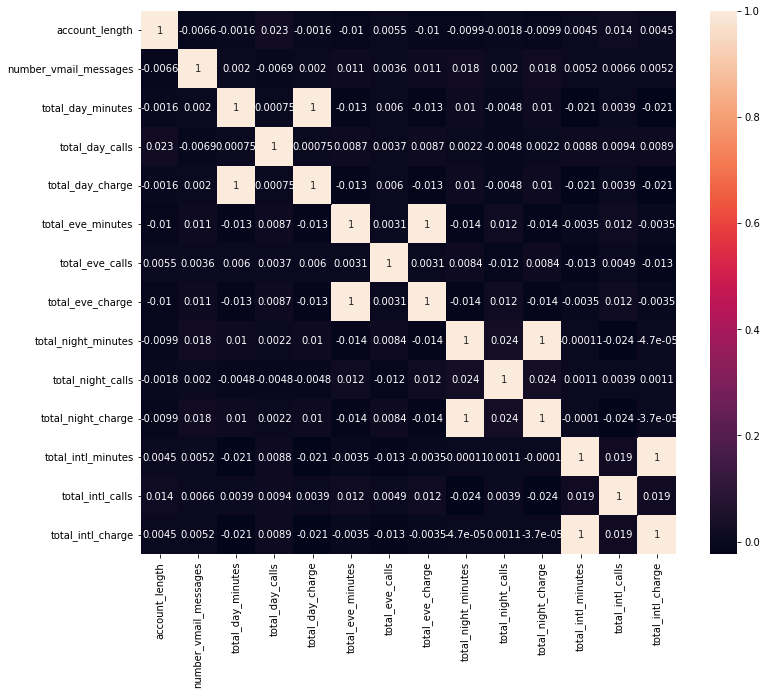

In [ ]:
# let's start with the correlation between them
corr = data[numerical_features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr,annot=True)

**We can remove total_day_charge, total_eve_charge, total_night_charge, total_international charge, as they are 100% correlated with respective minutes used.**

In [ ]:
numerical_features_updated1 = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes','total_night_calls', 'total_intl_minutes','total_intl_calls']

- figure is kind of container which holds axes/plots.

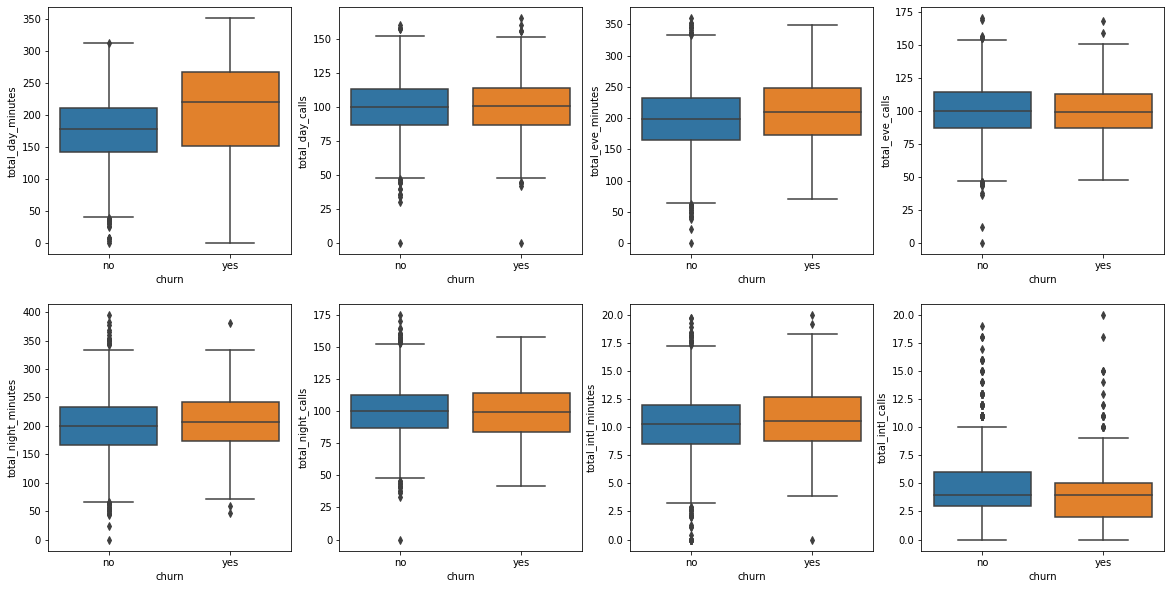

In [ ]:
# Initialise the subplot function using number of rows and columns
fig1, ax = plt.subplots(2,4,figsize=(20,10))


sns.boxplot(x='churn',y='total_day_minutes',data=data,ax=ax[0,0])
sns.boxplot(x='churn',y='total_day_calls',data=data,ax=ax[0,1])
sns.boxplot(x='churn',y='total_eve_minutes',data=data,ax=ax[0,2])
sns.boxplot(x='churn',y='total_eve_calls',data=data,ax=ax[0,3])
sns.boxplot(x='churn',y='total_night_minutes',data=data,ax=ax[1,0])
sns.boxplot(x='churn',y='total_night_calls',data=data,ax=ax[1,1])
sns.boxplot(x='churn',y='total_intl_minutes',data=data,ax=ax[1,2])
sns.boxplot(x='churn',y='total_intl_calls',data=data,ax=ax[1,3])

# Combine all the operations and display
plt.show()

- Looking at the above plots, there is not any significant difference between customers who stays and who leaves.
- It can be depicted that customer who has higher total number of minutes on call is more inclined to leave the company.

In [ ]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
data['number_customer_service_calls'].value_counts()

1    1524
2     947
0     886
3     558
4     209
5      81
6      28
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64

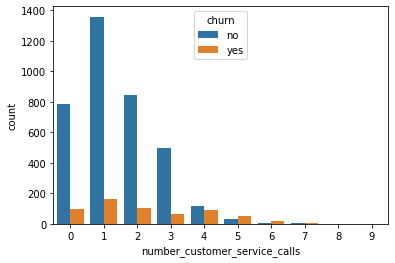

In [ ]:
sns.countplot(x='number_customer_service_calls',hue='churn',data=data)

In [ ]:
data[(data['number_customer_service_calls']>3) & (data['churn']=='yes')].shape[0]

170

In [ ]:
data[(data['number_customer_service_calls']>3) & (data['churn']=='no')].shape[0]

165

In [ ]:
# we are combining all the samples which receives more than 3 calls

data['number_customer_service_calls'] = data['number_customer_service_calls'].apply(lambda x : 4 if x>3 else x)

**If someone is getting more than 3 customer service calls then it is highly likely leave the company**

In [ ]:
temp = pd.get_dummies(data['area_code'],prefix='code')

In [ ]:
data = pd.concat([data,temp],axis=1)
# data.head()

In [ ]:
data.drop(['area_code','code_415'],axis=1,inplace=True)

In [ ]:
data['international_plan'] = data['international_plan'].map({'no':0,'yes':1})

In [ ]:
data['voice_mail_plan'] = data['voice_mail_plan'].map({'no':0,'yes':1})

In [ ]:
temp = pd.get_dummies(data['number_customer_service_calls'],prefix='customer_service_calls')

In [ ]:
data = pd.concat([data,temp],axis=1)
# data.head()

In [ ]:
data.drop(['customer_service_calls_4','number_customer_service_calls'],axis=1,inplace=True)

In [ ]:
data['churn'] = data['churn'].map({'no':0,'yes':1})

In [ ]:
data.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,churn,code_408,code_510,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3
0,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,0,0,0,0,1,0,0
1,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,0,0,1,0,0,0
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,0,1,0,0,0,1,0
3,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,0,0,0,0,0,0,1
4,MA,121,0,1,24,218.2,88,37.09,348.5,108,...,7.5,7,2.03,0,0,1,0,0,0,1


# Modelling

In [ ]:
X = data.drop(['state','churn'],axis=1)
y = data['churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn import metrics

def train_and_predict(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  pred = clf.predict(X_test)
  score = metrics.accuracy_score(pred,y_test)
  return score,pred

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
score, pred = train_and_predict(lr_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.8345098039215686


In [ ]:
from sklearn.svm import SVC
sv_clf = SVC()
score, pred = train_and_predict(sv_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9152941176470588


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
score, pred = train_and_predict(dtc_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9066666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
score, pred = train_and_predict(rf_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9364705882352942


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.7117437722419928

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
score, pred = train_and_predict(knn_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.876078431372549


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
score, pred = train_and_predict(gnb_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.864313725490196


In [ ]:
from sklearn.model_selection import cross_val_score
rf_clf2 = RandomForestClassifier()
scores = cross_val_score(rf_clf2,X_train,y_train,cv=4)
print(f'scores of cross validation is {scores}')

scores of cross validation is [0.92741935 0.93817204 0.92741935 0.92732167]


#Ensemble models

In [ ]:
from sklearn.ensemble import VotingClassifier
log_clf_vc = LogisticRegression()
rnd_clf_vc = RandomForestClassifier()
svm_clf_vc = SVC()
knn_clf_vc = KNeighborsClassifier()
gnb_clf_vc = GaussianNB()
dt_clf_vc = DecisionTreeClassifier()

estimators = [('lr', log_clf_vc), ('rf', rnd_clf_vc), ('svc', svm_clf_vc),('knn', knn_clf_vc),('gnb', gnb_clf_vc),('dt', dt_clf_vc)]
voting_clf = VotingClassifier(estimators=estimators,voting='hard')

In [ ]:
for clf in (log_clf_vc, rnd_clf_vc, svm_clf_vc,knn_clf_vc, gnb_clf_vc, dt_clf_vc, voting_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,metrics.accuracy_score(y_test,y_pred))

LogisticRegression 0.8345098039215686
RandomForestClassifier 0.9349019607843138
SVC 0.9152941176470588
KNeighborsClassifier 0.876078431372549
GaussianNB 0.864313725490196
DecisionTreeClassifier 0.899607843137255
VotingClassifier 0.9058823529411765


In [ ]:
from sklearn.ensemble import VotingClassifier
log_clf_vc = LogisticRegression()
rnd_clf_vc = RandomForestClassifier()
svm_clf_vc = SVC(probability=True)
knn_clf_vc = KNeighborsClassifier()
gnb_clf_vc = GaussianNB()
dt_clf_vc = DecisionTreeClassifier()

estimators = [('lr', log_clf_vc), ('rf', rnd_clf_vc), ('svc', svm_clf_vc),('knn', knn_clf_vc),('gnb', gnb_clf_vc),('dt', dt_clf_vc)]
voting_clf = VotingClassifier(estimators=estimators,voting='soft')

In [ ]:
for clf in (log_clf_vc, rnd_clf_vc, svm_clf_vc,knn_clf_vc, gnb_clf_vc, dt_clf_vc, voting_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,metrics.accuracy_score(y_test,y_pred))

LogisticRegression 0.8345098039215686
RandomForestClassifier 0.9333333333333333
SVC 0.9152941176470588
KNeighborsClassifier 0.876078431372549
GaussianNB 0.864313725490196
DecisionTreeClassifier 0.8972549019607843
VotingClassifier 0.9286274509803921


In [ ]:
from sklearn.ensemble import BaggingClassifier
bc_clf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10)
bc_clf.fit(X_train,y_train)
y_pred = bc_clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9309803921568628

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adc_clf = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
adc_clf.fit(X_train,y_train)
y_pred = adc_clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.8713725490196078

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)
y_score = gbc_clf.predict_proba(X_test)
y_pred = gbc_clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9411764705882353

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7474747474747475

#Feature Selection 
- Feature selection is the process of reducing the number of input variables.
- It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

- **Feature Selection** : Select a subset of input features from the dataset.
 - **Unsupervised**: Do not use the target variable (e.g. remove redundant variables).
Correlation
 - **Supervised**: Use the target variable (e.g. remove irrelevant variables).
 - **Wrapper**: Search for well-performing subsets of features.
   - RFE
 - **Filter**: Select subsets of features based on their relationship with the target.
   - Statistical Methods
   - Feature Importance Methods
 - **Intrinsic**: Algorithms that perform automatic feature selection during training.
   - Decision Trees
- **Dimensionality Reduction**: Project input data into a lower-dimensional feature space.

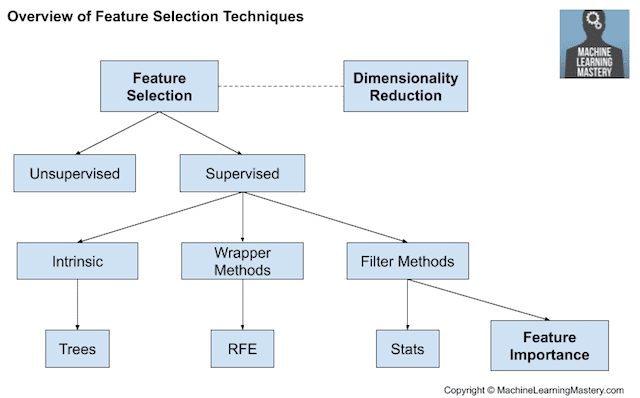

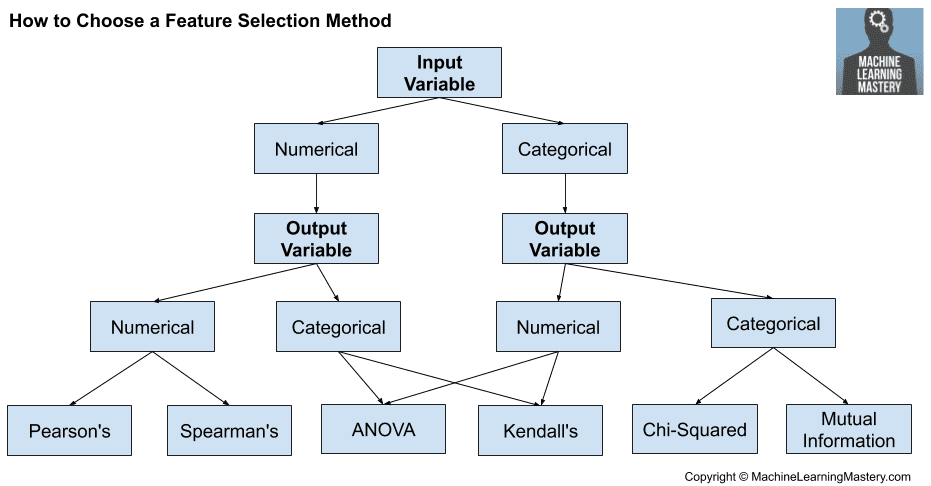

- We can also remove features which have a high correlation. For calculating the correlation between different numerical features, you can use the Pearson 
correlation.
- And now we can move to some univariate ways of feature selection. Univariate 
feature selection is nothing but a scoring of each feature against a given target. 
Mutual information, ANOVA F-test and chi2 are some of the most popular 
methods for univariate feature selection. There are two ways of using these in scikitlearn. 
 - SelectKBest: It keeps the top-k scoring features
 - SelectPercentile: It keeps the top features which are in a percentage 
specified by the user
- It must be noted that you can use chi2 only for data which is non-negative in nature.

In [ ]:
# Try different K-values (My observation : As value of k increases, score is also increasing)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif,k=15)
X_selected = fs.fit_transform(X_train,y_train)

In [ ]:
fs.get_feature_names_out()

array(['x1', 'x2', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x13',
       'x14', 'x15', 'x18', 'x19', 'x20'], dtype=object)

In [ ]:
X_selected[0:5]

array([[-0.31205935, -0.6023317 , -0.57527831,  0.74657128,  0.74651368,
         2.16400461,  2.16462409,  0.65146522,  0.64960332, -0.06098368,
         0.21769368, -0.05766896, -0.51309808,  1.33918902, -0.54121726],
       [-0.31205935, -0.6023317 , -0.57527831, -0.31022796, -0.31050689,
         1.66907246,  1.66922677,  1.23154327,  1.2294577 , -0.59859659,
         1.8297377 , -0.60198307,  1.94894512, -0.74672058, -0.54121726],
       [-0.31205935, -0.6023317 , -0.57527831,  0.12243375,  0.12269826,
         1.00650201,  1.00713177, -1.12088399, -1.12118273,  0.26158407,
        -0.58832834,  0.26095394, -0.51309808,  1.33918902, -0.54121726],
       [-0.31205935,  1.66021478,  1.65821695,  0.27156395,  0.27107103,
        -1.46416733, -1.46515914,  0.40658798,  0.40874074, -0.45523315,
         0.21769368, -0.45594758, -0.51309808, -0.74672058, -0.54121726],
       [-0.31205935, -0.6023317 , -0.57527831, -0.33048021, -0.33000112,
        -0.68584662, -0.68567141, -0.74353218, 

In [ ]:
temp_test = X_test[:,[1,2,3,4,6,7,9,10,12,13,14,15,18,19,20]] #fs.transform(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_selected,y_train)
y_score = gbc_clf.predict_proba(temp_test)
y_pred = gbc_clf.predict(temp_test)
metrics.accuracy_score(y_test,y_pred)

0.9294117647058824

The simplest form of selecting features would be to remove features with very 
low variance. If the features have a very low variance (i.e. very close to 0), they 
are close to being constant and thus, do not add any value to any model at all. It 
would just be nice to get rid of them and hence lower the complexity. Please note 
that the variance also depends on scaling of the data. Scikit-learn has an 
implementation for VarianceThreshold that does precisely this.

In [ ]:
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


account_length              1575.963008
international_plan             0.084515
voice_mail_plan                0.193233
number_vmail_messages        180.630433
total_day_minutes           2917.336473
total_day_calls              394.054948
total_day_charge              84.310888
total_eve_minutes           2525.014078
total_eve_calls              396.352000
total_eve_charge              18.243252
total_night_minutes         2535.479804
total_night_calls            403.737482
total_night_charge             5.134402
total_intl_minutes             7.618162
total_intl_calls               6.066709
total_intl_charge              0.555329
churn                          0.120936
code_408                       0.190279
code_510                       0.186777
customer_service_calls_0       0.165049
customer_service_calls_1       0.230057
customer_service_calls_2       0.173214
customer_service_calls_3       0.114083
dtype: float64

- Most of the time, people prefer doing feature selection using a machine 
learning model.
- Another greedy approach is known as recursive feature elimination (RFE). In the 
previous method, we started with one feature and kept adding new features, but in 
RFE, we start with all features and keep removing one feature in every iteration that 
provides the least value to a given model
-  But how to do we know which feature 
offers the least value? Well, if we use models like linear support vector machine 
(SVM) or logistic regression, we get a coefficient for each feature which decides 
the importance of the features
- In case of any tree-based models, we get feature 
importance in place of coefficients.
-  Please remember that when you use a model like logistic regression for 
binary classification, the coefficients for features are more positive if they are 
important for the positive class and more negative if they are important for the 
negative class.
